### Variance Reduced Stochastic Gradient

In [2]:
import numpy as np
import sklearn.datasets
import matplotlib.pyplot as plt
from scipy.sparse import csc_matrix

### Import dataset and reshape

In [3]:
# import dataset
X_train, y_train = sklearn.datasets.load_svmlight_file('gisette_scale') 
X_test, y_test = sklearn.datasets.load_svmlight_file('gisette_scale.t')

In [4]:
# convert y from 1/-1 to 1/0
y_train = np.maximum(y_train,0)
y_test = np.maximum(y_test,0)

In [5]:
# reshape y
y_train = np.reshape(y_train,(6000,1))
y_test = np.reshape(y_test,(1000,1))

### Likelihood and gradient functions

In [6]:
# function of binary negative log likelihood
def neg_log_likelihood(x,y,w):
    # number of observations
    n_obs = x.shape[0]
    # probability
    p = 1 / (1+np.exp((-x.dot(w)).toarray()))
    
    # likelihood
    R = np.log(p**y) + np.log((1-p)**(1-y))
    
    return np.sum(-R)/n_obs

In [7]:
# function of gradient of ginary negative log likelihood
# return value is csc_matrix type verical vector
def grad_neg_log_likelihood(x,y,w):
    # number of observations
    n_obs = x.shape[0]
    # probability
    p = 1 / (1+np.exp((-x.dot(w)).toarray()))
    
    # gradient
    g = (csc_matrix(p-y).transpose()).dot(x) / n_obs
    
    return g.transpose()

### Predict and accuracy functions

In [8]:
# function of predicting
def predict(x,w):
    # number of observations
    n_obs = x.shape[0]
    
    # set up binary probability table
    p = 1 / (1+np.exp((-x.dot(w)).toarray()))
    p_table = np.hstack((1-p,p))
    
    # make prediction
    max_index = np.argmax(p_table,axis=1)
    
    return np.reshape(max_index,(n_obs,1))

# function of calculating accuracy
def accuracy(x,y,w):
    # number of observations
    n_obs = x.shape[0]
    
    # make prediction
    prediction = predict(x,w)
    
    # count incorrect prediction
    incorrect = np.sum(np.square(prediction-y))
    # calculate accuracy
    acc = 1 - incorrect/n_obs
    
    return acc    

### SG algorithm

In [29]:
# function stochastic gradient descent with regularization
def stochastic_gradient_descent(x_train,y_train,x_test,y_test,loss_and_grad,init_w,alpha,n_its,acc_func,reg_lambda=10**(-3)):
    # loss function and its gradient
    loss = loss_and_grad[0]
    grad_loss = loss_and_grad[1]
    
    # history of w, loss, and acc_test
    w_hist = []
    train_loss_hist = []
    test_loss_hist = []
    acc_test_hist = []
    
    # initiate w
    w = init_w
    # number of train observations
    n_train = x_train.shape[0]
    
    # loss and acc_test
    new_train_loss = loss(x_train,y_train,w)
    new_test_loss = loss(x_test,y_test,w)
    new_acc_test = acc_func(x_test,y_test,w)
    # append history
    w_hist.append(w)
    train_loss_hist.append(new_train_loss)
    test_loss_hist.append(new_test_loss)
    acc_test_hist.append(new_acc_test)
    
    # index of observations
    index = np.array(range(n_train))
    
    # n_its interations of descent
    for iteration in range(n_its):

        # reshuffle dataset index
        np.random.shuffle(index)
        
        # for each observation
        for i in index:
            grad_i = grad_loss(x_train[i:i+1,:],y_train[i:i+1],w)
            # add regularization
            grad_i += reg_lambda * w
            # individual gradient descent
            w = w - alpha * grad_i
        
        # loss and acc_test
        new_train_loss = loss(x_train,y_train,w)
        new_test_loss = loss(x_test,y_test,w)
        new_acc_test = acc_func(x_test,y_test,w)
        
        # append history
        w_hist.append(w)
        train_loss_hist.append(new_train_loss)
        test_loss_hist.append(new_test_loss)
        acc_test_hist.append(new_acc_test)
        
        print('Epoch: '+str(iteration+1))
        print('Training loss='+str(new_train_loss))
        
    return w_hist, train_loss_hist, test_loss_hist, acc_test_hist 

### Training using SG:

In [32]:
# SG training
loss_and_grad = [neg_log_likelihood,grad_neg_log_likelihood]
init_w = csc_matrix(np.zeros((5000,1)))
w,train_l,test_l,test_acc=stochastic_gradient_descent(X_train,y_train,X_test,y_test,loss_and_grad,
                                                      init_w,0.005,20,accuracy) 

Epoch: 1
Training loss=0.10105919358090461
Epoch: 2
Training loss=0.05193526302249651
Epoch: 3
Training loss=0.023149864243370406
Epoch: 4
Training loss=0.012126358956397828
Epoch: 5
Training loss=0.019137973286411692
Epoch: 6
Training loss=0.00926180950721326
Epoch: 7
Training loss=0.008458869458734994
Epoch: 8
Training loss=0.002852988498055728
Epoch: 9
Training loss=0.012501702686231861
Epoch: 10
Training loss=0.0011209379362844538
Epoch: 11
Training loss=0.0009631607953983853
Epoch: 12
Training loss=0.0010977984687025792
Epoch: 13
Training loss=0.0009384254695628107
Epoch: 14
Training loss=0.0011628366258759587
Epoch: 15
Training loss=0.0012200890255848087
Epoch: 16
Training loss=0.0013831009707338693
Epoch: 17
Training loss=0.0012711477657764796
Epoch: 18
Training loss=0.0015773511577931766
Epoch: 19
Training loss=0.0014672685069600326
Epoch: 20
Training loss=0.001738723163699432


### SG plot and final results

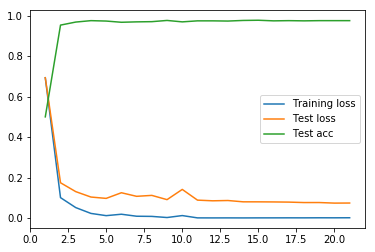

In [33]:
# plot SG
epoch_list = np.linspace(1,21,21)
plt.plot(epoch_list,train_l)
plt.plot(epoch_list,test_l)
plt.plot(epoch_list,test_acc)
plt.legend(['Training loss','Test loss','Test acc'], loc='center right')
plt.show()

In [43]:
# final training loss, test loss, and test accuracy
print('Training loss='+str(train_l[20])+'. Test loss='+str(test_l[20])+'. Test acc='+str(test_acc[20]))

Training loss=0.001738723163699432. Test loss=0.07443071767560058. Test acc=0.975


### SVRG algorithm

In [35]:
# function of stochastic variance reduced gradient
def SVRG(x_train,y_train,x_test,y_test,loss_and_grad,init_w,alpha,j,n_its,acc_func,reg_lambda=10**(-3)):
    # loss function and its gradient
    loss = loss_and_grad[0]
    grad_loss = loss_and_grad[1]
    
    # history of w, loss, and acc_test
    w_hist = []
    train_loss_hist = []
    test_loss_hist = []
    acc_test_hist = []
    
    # initiate w
    w = init_w
    # number of train observations
    n_train = x_train.shape[0]
    
    # loss and acc_test
    new_train_loss = loss(x_train,y_train,w)
    new_test_loss = loss(x_test,y_test,w)
    new_acc_test = acc_func(x_test,y_test,w)
    # append history
    w_hist.append(w)
    train_loss_hist.append(new_train_loss)
    test_loss_hist.append(new_test_loss)
    acc_test_hist.append(new_acc_test)
    
    # n_its interations of descent
    for iteration in range(n_its):
        # calculate mu
        mu = grad_loss(x_train,y_train,w)
        mu += reg_lambda*w
        
        # w0 of this iteration
        w_new = w
        
        # m interations
        for t in range(j*n_train):
            # randomly draw i_t and correcponding x_i and y_i
            i_t = np.random.randint(n_train)
            x_i = x_train[i_t:i_t+1,:]
            y_i = y_train[i_t:i_t+1]
            
            # update w_new
            w_new = w_new - alpha * (grad_loss(x_i,y_i,w_new) + reg_lambda*w_new - grad_loss(x_i,y_i,w) - reg_lambda*w + mu)
        
        # update w
        w = w_new
        
        # loss and acc_test
        new_train_loss = loss(x_train,y_train,w)
        new_test_loss = loss(x_test,y_test,w)
        new_acc_test = acc_func(x_test,y_test,w)
        
        # append history
        w_hist.append(w)
        train_loss_hist.append(new_train_loss)
        test_loss_hist.append(new_test_loss)
        acc_test_hist.append(new_acc_test)
        
        print('Epoch: '+str(iteration+1))
        print('Training loss='+str(new_train_loss))
    
    return w_hist, train_loss_hist, test_loss_hist, acc_test_hist 

### SVRG training:

In [38]:
# SVRG training 
loss_and_grad = [neg_log_likelihood,grad_neg_log_likelihood]
init_w = csc_matrix(np.zeros((5000,1)))
w_1,train_l_1,test_l_1,test_acc_1=SVRG(X_train,y_train,X_test,y_test,loss_and_grad,
                                       init_w,0.004,2,20,accuracy)

D:\Tools\Anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


Epoch: 1
Training loss=inf
Epoch: 2
Training loss=0.6662199659877608
Epoch: 3
Training loss=0.19138430246972268
Epoch: 4
Training loss=0.08793982533507709
Epoch: 5
Training loss=0.018196241390638843
Epoch: 6
Training loss=0.01721855072720028
Epoch: 7
Training loss=0.003321445615477535
Epoch: 8
Training loss=0.0012647310206675933
Epoch: 9
Training loss=0.0005481729233211625
Epoch: 10
Training loss=0.0004912797931621917
Epoch: 11
Training loss=0.0005074773803575043
Epoch: 12
Training loss=0.0005476400466654624
Epoch: 13
Training loss=0.0006049069926337678
Epoch: 14
Training loss=0.0006765784818675063
Epoch: 15
Training loss=0.0007622202368480246
Epoch: 16
Training loss=0.0008630180717429408
Epoch: 17
Training loss=0.0009792989613813456
Epoch: 18
Training loss=0.001114315273472786
Epoch: 19
Training loss=0.0012620844573796918
Epoch: 20
Training loss=0.001422980586390406


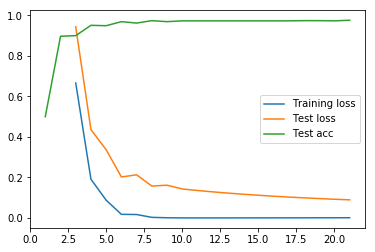

In [39]:
# plot SVRG
epoch_list = np.linspace(1,21,21)
plt.plot(epoch_list,train_l_1)
plt.plot(epoch_list,test_l_1)
plt.plot(epoch_list,test_acc_1)
plt.legend(['Training loss','Test loss','Test acc'], loc='center right')
plt.show()

In [44]:
# final training loss, test loss, and test accuracy
print('Training loss='+str(train_l_1[20])+'. Test loss='+str(test_l_1[20])+'. Test acc='+str(test_acc_1[20]))

Training loss=0.001422980586390406. Test loss=0.08971410535612186. Test acc=0.976


### SAGA algorithm

In [9]:
# function of SAGA 
def SAGA(x_train,y_train,x_test,y_test,loss_and_grad,init_w,alpha,n_its,acc_func,reg_lambda=10**(-3)):
    # loss function and its gradient
    loss = loss_and_grad[0]
    grad_loss = loss_and_grad[1]
    
    # history of w, loss, and acc_test
    w_hist = []
    train_loss_hist = []
    test_loss_hist = []
    acc_test_hist = []
    
    # initiate w
    w = init_w
    # number of train observations
    n_train = x_train.shape[0]
    # number of features
    n_feature = x_train.shape[1]
    # initiate mu
    mu = csc_matrix((n_feature,1))
    # initiate grad_list
    grad_list = []
    
    # loss and acc_test
    new_train_loss = loss(x_train,y_train,w)
    new_test_loss = loss(x_test,y_test,w)
    new_acc_test = acc_func(x_test,y_test,w)
    # append history
    w_hist.append(w)
    train_loss_hist.append(new_train_loss)
    test_loss_hist.append(new_test_loss)
    acc_test_hist.append(new_acc_test)
    
    # epoch 1 of initiating
    for i in range(n_train):
        x_i = x_train[i:i+1,:]
        y_i = y_train[i:i+1]
        
        # calculate new gradient
        grad_new = grad_loss(x_i,y_i,w) + reg_lambda*w
        # update grad_list
        grad_list.append(grad_new)
        
        # update w_new and w_old
        w = w - alpha * (grad_new + mu)
        # update mu
        mu = mu.multiply(i/(i+1)) + grad_new.multiply(1/(i+1))
    
    # loss and acc_test
    new_train_loss = loss(x_train,y_train,w)
    new_test_loss = loss(x_test,y_test,w)
    new_acc_test = acc_func(x_test,y_test,w)
    # append history
    w_hist.append(w)
    train_loss_hist.append(new_train_loss)
    test_loss_hist.append(new_test_loss)
    acc_test_hist.append(new_acc_test)
    
    print('Epoch: 1')
    print('Training loss='+str(new_train_loss))
    
    # index of observations
    index = np.array(range(n_train))
    
    # n_its interations of descent
    for iteration in range(1,n_its):
        # reshuffle dataset index
        np.random.shuffle(index)
        
        # for each observation
        for i in index:
        
            x_i = x_train[i:i+1,:]
            y_i = y_train[i:i+1]
        
            # calculate new gradient
            grad_new = grad_loss(x_i,y_i,w) + reg_lambda*w
            # get old gradient from grad_list
            grad_old = grad_list[i]
        
            # update w_new and w_old
            w = w - alpha * (grad_new - grad_old + mu)
            # update grad_list
            grad_list[i] = grad_new
            # update mu
            mu = mu - grad_old.multiply(1/n_train) + grad_new.multiply(1/n_train)
        
        # loss and acc_test
        new_train_loss = loss(x_train,y_train,w)
        new_test_loss = loss(x_test,y_test,w)
        new_acc_test = acc_func(x_test,y_test,w)
        
        # append history
        w_hist.append(w)
        train_loss_hist.append(new_train_loss)
        test_loss_hist.append(new_test_loss)
        acc_test_hist.append(new_acc_test)
        
        print('Epoch: '+str(iteration+1))
        print('Training loss='+str(new_train_loss))
    
    return w_hist, train_loss_hist, test_loss_hist, acc_test_hist 

### SAGA training

In [27]:
loss_and_grad = [neg_log_likelihood,grad_neg_log_likelihood]
init_w = csc_matrix(np.zeros((5000,1)))
w_2,train_l_2,test_l_2,test_acc_2=SAGA(X_train,y_train,X_test,y_test,loss_and_grad,init_w,0.002,20,accuracy)

Epoch: 1
Training loss=0.06844510799932592
Epoch: 2
Training loss=0.07422097559093568
Epoch: 3
Training loss=0.04625845098428207
Epoch: 4
Training loss=0.034076833105089264
Epoch: 5
Training loss=0.02086607680464035
Epoch: 6
Training loss=0.014824849910143285
Epoch: 7
Training loss=0.10955238362380006
Epoch: 8
Training loss=0.015653755332982543
Epoch: 9
Training loss=0.013168913209434953
Epoch: 10
Training loss=0.01094920356394952
Epoch: 11
Training loss=0.005875343543683862
Epoch: 12
Training loss=0.005135533586951102
Epoch: 13
Training loss=0.004258869347254949
Epoch: 14
Training loss=0.004583942250388713
Epoch: 15
Training loss=0.00411664120290573
Epoch: 16
Training loss=0.0038819334400500647
Epoch: 17
Training loss=0.003609917640930541
Epoch: 18
Training loss=0.0035887296236597303
Epoch: 19
Training loss=0.0035869987996390855
Epoch: 20
Training loss=0.003456206027750404


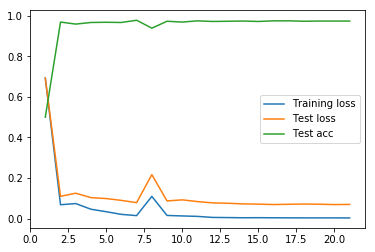

In [28]:
# plot SAGA
epoch_list = np.linspace(1,21,21)
plt.plot(epoch_list,train_l_2)
plt.plot(epoch_list,test_l_2)
plt.plot(epoch_list,test_acc_2)
plt.legend(['Training loss','Test loss','Test acc'], loc='center right')
plt.show()

In [45]:
# final training loss, test loss, and test accuracy
print('Training loss='+str(train_l_2[20])+'. Test loss='+str(test_l_2[20])+'. Test acc='+str(test_acc_2[20]))

Training loss=0.003456206027750404. Test loss=0.06990794268880193. Test acc=0.974


### Compare results and plots

For SG:

Training loss=0.001738723163699432. Test loss=0.07443071767560058. Test acc=0.975

For SVRG:

Training loss=0.001422980586390406. Test loss=0.08971410535612186. Test acc=0.976

For SAGA:

Training loss=0.003456206027750404. Test loss=0.06990794268880193. Test acc=0.974

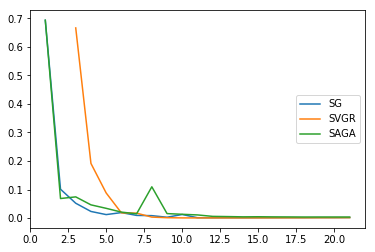

In [40]:
# plot training loss
epoch_list = np.linspace(1,21,21)
plt.plot(epoch_list,train_l)
plt.plot(epoch_list,train_l_1)
plt.plot(epoch_list,train_l_2)
plt.legend(['SG','SVGR','SAGA'], loc='center right')
plt.show()

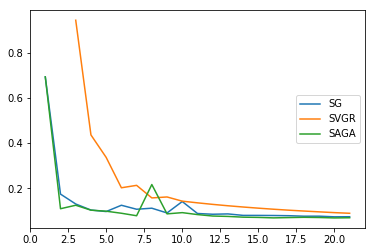

In [41]:
# plot test loss
epoch_list = np.linspace(1,21,21)
plt.plot(epoch_list,test_l)
plt.plot(epoch_list,test_l_1)
plt.plot(epoch_list,test_l_2)
plt.legend(['SG','SVGR','SAGA'], loc='center right')
plt.show()

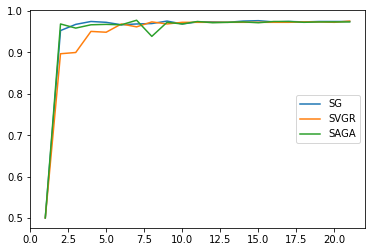

In [42]:
# plot test loss
epoch_list = np.linspace(1,21,21)
plt.plot(epoch_list,test_acc)
plt.plot(epoch_list,test_acc_1)
plt.plot(epoch_list,test_acc_2)
plt.legend(['SG','SVGR','SAGA'], loc='center right')
plt.show()